# Digitale Techniken: Data Extraction and plotting
2023-10, johanna.kerch@uni-goettingen.de, goeran.liebs@uni-goettingen.de

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" style="height:50px" align="left"/> 

https://creativecommons.org/licenses/by-nc-sa/4.0/

### Keep numbers in memory and be ready for higher mathematics with the module ```numpy```:

A module for Python that allows you to work with multidimensional arrays and mathematical calculations.

In [ ]:
# import the module for nummerical n-dim arrays (fields, vectors, tensors, etc...)
import numpy as np    # appreviation convention

In [ ]:
# create an array with 2 lines and 3 columns
Array2x3 = np.array([[56,  1,      3],
                     [40,200,300.000]])
print(Array2x3)
type(Array2x3)

In [ ]:
np.mean(Array2x3) # mean-METHOD of all values, ONLY ON OF MANY ARRAY FUNCTIONS

In [ ]:
Array2x3[0,:] #  first line 

In [ ]:
Array2x3[:,1] # second column

<a id='sectionPlot'></a>
## How to find, open, read and plot data from files


But first let's define a string containing the path and a wildcard ```*``` and the desired file endings. Later you might loop over many data files to read them all. <br>
This keeps your code running on several operation systems (OS), because subfolders are seperated with ```/``` or ```\``` concerning the OS of your computer.

In [ ]:
import os # use functionality of your OS formulated in python

In [ ]:
path = os.path.join('..','data','sea_ice_extent','*.csv')# its just a string that will be modivied concerning your machines OS
path

Find all files matching a pattern, using ```glob```:

In [ ]:
from glob import glob
files = glob(path)
files #check that list, shouting to 

Data were obtained from https://nsidc.org/data/seaice_index/archives, 2021-02-08.<br>
Fetterer, F., K. Knowles, W. N. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. 2020-11-30.

Open a file object, obtain a file handle, that is, not yet the actual content of the file:

In [ ]:
open_file = open(files[-1]) # open last file in the list
header = open_file.readline()   # first line is red, 
#mouseover and hit SHIFT and TAP 
year=[]# make some empty lists
extent=[]
area=[]
for line in open_file: #iterate over the open_file list
    line = line.strip() # Use the method strip to pull off first and last characters
    #print(line[3])
    cols = line.split(',') # split to separate the columns, seperated by commas:
    
    year.append(float(cols[0])) # add an element each iterarion to the lists as FLOATS
    extent.append(float(cols[4]))
    area.append(float(cols[5]))

year=np.array(year)           # transfomation to np.arrays for nice operattions
extent=np.array(extent)
area=np.array(area)

In [ ]:
import matplotlib.pyplot as plt # submodules, MAKE SOME NICE PLOTS
plt.plot(year,extent,'D-', label='Goddard, DATA-TYPE')
plt.xlabel('Year')
plt.ylabel('extent [unit]')
plt.title('Read the Paper')
plt.grid(True)
plt.legend();

In [ ]:


plt.plot(year,area,'D-', label='Goddard, DATA-TYPE')
plt.xlabel('Year')
plt.ylabel('area [unit]')
plt.title('Read the Paper')
plt.grid(True)
plt.legend();
plt.ylim(2,6)        #UUUHHH an outlayer

# Alternatively for column-based data (more convenient):

In [ ]:
depth, temperature = np.loadtxt('../data/kcctemp.dat', unpack=True, skiprows=1)
depth

In [ ]:
data = np.loadtxt('../data/kcctemp.dat', skiprows=1)

In [ ]:
plt.plot(data[:,1],data[:,0])
plt.gca().invert_yaxis()

# Try out the possibilities to read files

In [ ]:
# Method 1: Using for loop

In [ ]:
open_file = open(files[-1]) # open last file in the list
header = open_file.readline()   # first line is red, 
#mouseover and hit SHIFT and TAP 
year=[]# make some empty lists
extent=[]
area=[]
for line in open_file: #iterate over the open_file list
    line = line.strip() # Use the method strip to pull off first and last characters
    #print(line[3])
    cols = line.split(',') # split to separate the columns, seperated by commas:
    
    year.append(float(cols[0])) # add an element each iterarion to the lists as FLOATS
    extent.append(float(cols[4]))
    area.append(float(cols[5]))

year=np.array(year)           # transfomation to np.arrays for nice operattions
extent=np.array(extent)
area=np.array(area)

In [ ]:
year

In [ ]:
plt.plot(year,extent,'D-', label='Goddard, DATA-TYPE')

In [ ]:
#Same method, but other file
with open('../data/data_joker_1.txt', 'r') as f:
    datetime = []
    lightIntensity = []
    temperature = []
    relativeHumidity = []
    ppmCO2 = []

    for line in f:
        line = line.strip()
        datarecord=line.split(',')
        lightIntensity.append(datarecord[1])
        temperature.append(datarecord[2])
        relativeHumidity.append(datarecord[3])
        ppmCO2.append(cols[4])
     

plt.plot(np.asarray(temperature[1:],float))

In [ ]:
# Method 2: list comprehension
with open('../data/data_joker_1.txt', 'r') as f:

    list_of_lists = []
    next(f)#skip firstline
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        inner_floats = np.array([float(x) for x in inner_list[1:]])
        list_of_lists.append(inner_floats)

matrix=np.array(list_of_lists)
#skip fisrt column
plt.plot(matrix[:,1])

In [ ]:
# Method 3: Using a string for all
str = open('../data/data_joker_1.txt', 'r').read()
megastr=str.replace ('\n',',')
megalist=megastr.split(',')
datetime=megalist[0::5] ###look down to daytime module...
lightIntensity=np.asarray(megalist[6::5])
temperature=megalist[7::5]
relativeHumidity=np.asarray(megalist[8::5])
ppmCO2=np.asarray(megalist[9::5])

plt.plot(np.asarray(temperature,float))

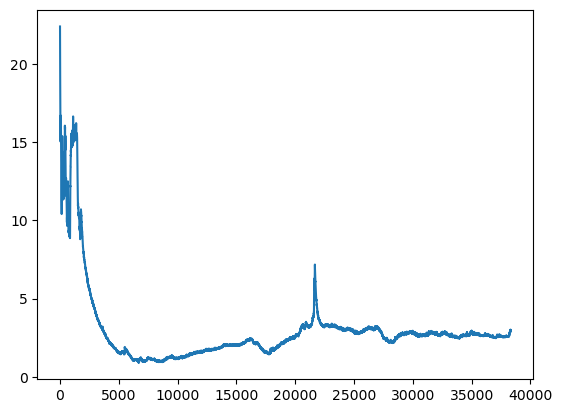

In [11]:
# Method 4: Using map() function
# workout...
with open('../data/data_joker_1.txt', 'r') as f:
    lines = list(map(str.strip, f))
    comma_separated = ", ".join(lines)# a sting with all characters
    longlist=comma_separated.split(',')
    
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.asarray(longlist[7::5],float))

In [ ]:
# Method 5: the power of numpy
import numpy as np  #help(np.loadtxt)
matrix2 = np.loadtxt('../data/data_joker_1.txt', usecols=[1,2,3], skiprows=1, delimiter=',')
plt.plot(matrix2[: ,1])

#### Writing files

Exercise: Invert the processes above. But rember we already have so much datafiles... 
What is Database normalization?

#### Date formatting, Time is relativ

In [ ]:
import datetime
dt = datetime.datetime(2001, 1, 31, 10, 51, 0) #an time object, an other format... IoI
#different date formats
print(dt.strftime('%d-%m-%Y::%H-%M'))
print(dt.strftime('%Y,%m,%d;%H:%M'))
print(dt.strftime('%Y-%d-%m:ß%!:%HUhr%M'))
   
###  Calculating time in different units    

d1 = datetime.date(1869, 1, 2) #two other time object
d2 = datetime.date(1869, 10, 2)

# Solutionn
print(str(d2 - d1)+' Zeit in Tagen')  # timedelta
print(str((d2-d1).total_seconds())+'Zeit in Sekunden') #
   

## <b> Pandas

https://pandas.pydata.org/

- basically, this is "Excel" functionality within Python
- it is much faster than Excel for large data sets and especially if you use mixed data (numeric and other/factors)

Data is read as a data frame:

In [ ]:
import pandas as pd    # conventional alias!

df = pd.read_csv(files[-1], usecols = [0,4,5])

In [ ]:
df

### <b> Welcome to the data-jungle
    
Here a nice example: we direct download radar data with the unix/bash tool curl.
But its a data file of a Matlab workspace...

In [2]:
!curl -o How2readwithPy.mat https://data.cresis.ku.edu/data/rds/2017_Greenland_P3/CSARP_standard/20170428_03/Data_img_02_20170428_03_021.mat 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17.8M  100 17.8M    0     0  5214k      0  0:00:03  0:00:03 --:--:-- 5214k


In [13]:

import numpy as np, h5py 
f = h5py.File('How2readwithPy.mat','r') 
print(f)
data = f.get('') # Get a certain dataset
data = np.array(data)


<HDF5 file "How2readwithPy.mat" (mode r)>


TypeError: Group.get() missing 1 required positional argument: 'name'

In [11]:
f

<HDF5 file "How2readwithPy.mat" (mode r)>

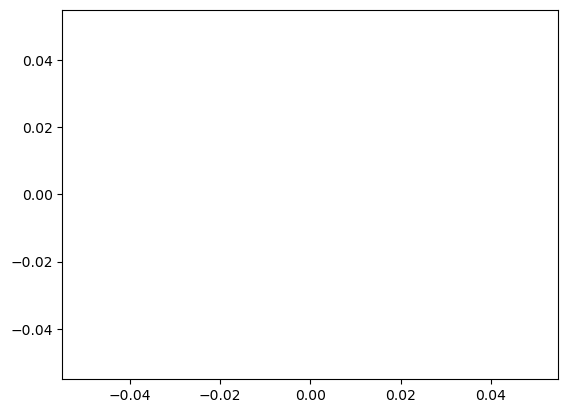

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(data)

## Exercise

Try this at home:
- open a Jupyter notebook
- take some data you work with (in Excel)
- use the simple routine I've shown above or pandas
- _or_ research other ways of opening/reading data from files with python
- approach me if it's not working, share your notebook/file and I'll try to help

In [ ]:
## ... tracking changes....

In [ ]:
#!git checkout Zweigname

In [24]:
!git add 03_DT_python_readNplot.ipynb 03_DT_python_readNplot.ipynb #or use --all

In [25]:
!git commit -m 'free the data'

[main 2a1de56] free the data
 1 file changed, 8 insertions(+), 8 deletions(-)


In [26]:
!git push --set-upstream origin main

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 499 bytes | 499.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: 
remote: ========================================================================
remote: 
remote:      Dear Gitlab users, on Thursday, 19.10.2023, we will swith the
remote:      login-method to SSO-only. If you are not sure what this means,
remote:                       please read our newest [FAQ
remote: entry](https://faq.gwdg.de/index.php?action=artikel&cat=57&id=433&artlang=de).
remote:       Gitlab will not be available on that day between 5:00 pm and
remote:                          approximately 5:30 pm.
remote: 
remote: ========================================================================
remote: 
To gitlab.gwdg.de:liebs2/digitale-techniken-wise2324-pre.git
   1c4a3cf..2a1de56  main -> main
Branch 'main' set up 